In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)




In [7]:
suicide_dataset = pd.read_csv('Dataset/Reddit/data.csv', encoding = "latin")
suicide_dataset.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide


In [4]:
suicide_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
suicide_dataset = suicide_dataset.drop('Unnamed: 0',axis=1)

In [6]:
print(suicide_dataset['text'][117])
len(suicide_dataset["text"][117])


I want to cry, god fucking damnit I want to cry. Growing up being ridiculed for crying, being bullied for it, I've stopped. I don't know exactly when it stopped, but I just didn't cry anymore.

Maybe it's because I don't have an outlet to confide in. Maybe I just need someone to talk to. But guess what? I can't. I can't talk about my problems to someone I know. What if they think I'm pathetic? What if they think I'm weird? What if they think I'm weak? I don't want to be seen as such, so I've refrained. But it's been so fucking long since I've cried my heart out. My heart has cracked, but nothing is escaping. I constantly feel sad, on the verge of a breakdown. But just when I think it's finally going to happen, I'm finally going to release my pent up stress and feelings, I stop myself. 

I haven't been able to go on and cry, get emotional, get real. I'm so fucking done with this. I don't trust anyone enough to talk to them. I have people I know I can trust, but for some reason I don't t

1243

### Checking for missing and null values

In [7]:
# suicide_dataset[suicide_dataset["text"].isnull()].head(10)
suicide_dataset.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
suicide_dataset['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

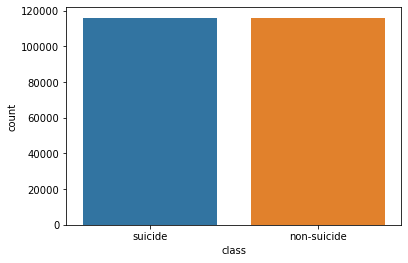

In [9]:
sns.countplot(x='class', data=suicide_dataset)
plt.show()

In [10]:
suicide_dataset.iloc[0:3]

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide


### Text cleaning

In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
suicide_dataset['text'] = suicide_dataset['text'].apply(clean_text)
suicide_dataset.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally is almost over... so i can never hear...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i’m so losthello, my name is adam () and i’ve ...",suicide


### Remove Stopwords

In [13]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
suicide_dataset['text'] = suicide_dataset['text'].apply(remove_stopwords)
suicide_dataset.head()


,text,class
0,ex wife threatening suiciderecently left wife ...,suicide
1,weird get affected compliments coming someone ...,non-suicide
2,"finally almost over... never hear "" bad year""...",non-suicide
3,need helpjust help im crying hard,suicide
4,"i’m losthello, name adam () i’ve struggling ye...",suicide


### Stemming

Stemming reduces the inflectional and derivational forms of words to a common base form, which can simplify text analysis and improve the accuracy of text-based applications.

For example, the words "running", "runs", and "ran" can be reduced to their stem "run", which can help to identify them as variants of the same word and thus improve the accuracy of analysis.

In [14]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

suicide_dataset['text'] = suicide_dataset['text'].apply(stemm_text)
suicide_dataset.head()

,text,class
0,ex wife threaten suiciderec left wife good che...,suicide
1,weird get affect compliment come someon know i...,non-suicide
2,"final almost over... never hear "" bad year"" e...",non-suicide
3,need helpjust help im cri hard,suicide
4,"i'm losthello, name adam () i'v struggl year i...",suicide


### Target Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

a = LabelEncoder()
a.fit(suicide_dataset['class'])

suicide_dataset['class'] = a.transform(suicide_dataset['class'])
suicide_dataset.head()

,text,class
0,ex wife threaten suiciderec left wife good che...,1
1,weird get affect compliment come someon know i...,0
2,"final almost over... never hear "" bad year"" e...",0
3,need helpjust help im cri hard,1
4,"i'm losthello, name adam () i'v struggl year i...",1


### Model

In [16]:
from sklearn.model_selection import train_test_split
x = suicide_dataset['text']
y = suicide_dataset['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=3891472)
vectoriser.fit(x_train)

x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)
#print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [27]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [37]:
from scipy.sparse import csr_matrix

In [25]:
xtrain = pd.DataFrame(todense(x_train))

NameError: name 'todense' is not defined

In [24]:
xtrain.head()

,0
0,"(0, 2914350)\t0.3174941357876058\n (0, 2914..."
1,"(0, 3074175)\t0.07553668881581525\n (0, 307..."
2,"(0, 2699403)\t0.1597481665770727\n (0, 2697..."
3,"(0, 2629112)\t0.09285753723058378\n (0, 262..."
4,"(0, 2884773)\t0.16331978729033472\n (0, 288..."


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Test accuracy: 0.9367
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29074
           1       0.94      0.94      0.94     28945

    accuracy                           0.94     58019
   macro avg       0.94      0.94      0.94     58019
weighted avg       0.94      0.94      0.94     58019



/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
